In [1]:
import torch
import random
import datetime
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/tmp/user/1000/ipykernel_46486/2467509857.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
purchase_df = pd.read_csv('../data/purchase.csv')
boxes_df = pd.read_csv('../data/boxes.csv')

In [3]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [4]:
base_date = datetime.date(2018, 10, 1)
purchase_df['day'] = purchase_df['PURCHASE_DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%d/%m/%Y').date() - base_date).days)

In [5]:
purchase_df.sample(10)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1741384,7/11/2018,2CE529D89A2,27.0,1.0,37
1871291,4/11/2018,2CE39348617,15.0,1.0,34
2115211,13/10/2018,2C96F6AC4D6,131.0,1.0,12
591494,1/1/2019,2CE990D19E6,104.0,1.0,92
657323,4/1/2019,2C7FD47464E,89.0,1.0,95
2041807,6/10/2018,29782768084,260.0,1.0,5
2454743,30/10/2018,28DE6800B62,246.0,1.0,29
214610,11/2/2019,2C98D359845,144.0,1.0,133
2136506,12/10/2018,2C7CF9A0CB5,89.0,1.0,11
2386149,22/10/2018,2C1DF6A0DB2,89.0,1.0,21


In [6]:
purchase_df.drop(['PURCHASE_DATE'], axis=1, inplace=True)

In [7]:
customer_keys = purchase_df['MAGIC_KEY'].unique()
customer_ids = {customer_keys[i]: i for i in range(len(customer_keys))}

In [8]:
purchase_df.drop(purchase_df[purchase_df['BOX_ID'].isnull()].index, inplace=True)
purchase_df.drop(purchase_df[purchase_df['BOX_COUNT'] < 0].index, inplace=True)

In [9]:
purchase_df['BOX_COUNT'] = purchase_df['BOX_COUNT'].astype(int)
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [10]:
purchase_df.sample(10)

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1655756,2C50AFE8646,143,1,34
1721387,2BF15540ABD,107,1,46
1707671,2C990B61FAD,106,1,58
1636872,2C031C02A12,143,1,44
646785,2C75F6566C2,144,1,95
1737998,2C2DE387128,103,1,56
586004,2C1206A0550,108,1,150
2005861,2C15BB3C1BF,37,1,4
480637,2CB516E3396,76,1,147
1046457,2CB96E5679A,162,1,119


In [11]:
len(purchase_df['MAGIC_KEY'].unique())

1274087

In [12]:
len(purchase_df)

2455800

In [13]:
purchases = [[] for _ in range(len(customer_keys))]
purchase_df.apply(lambda x: purchases[customer_ids[x['MAGIC_KEY']]].append((x['BOX_ID'], x['BOX_COUNT'], x['day'])), axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2455859    None
2455860    None
2455861    None
2455862    None
2455863    None
Length: 2455800, dtype: object

In [14]:
prob2_df =pd.read_csv('../data/problem 2.csv')
prob2_df.head()

,MAGIC_KEY
0,2C0B5F97180
1,2C2F659EF00
2,29D629EDF20
3,2A7073E2FF0
4,2A9B9BE1210


In [15]:
len(prob2_df)

43518

In [16]:
prob3_customers = [customer_ids[x] for x in prob2_df['MAGIC_KEY'].unique()]
len(prob3_customers)

43518

Matplotlib is building the font cache; this may take a moment.


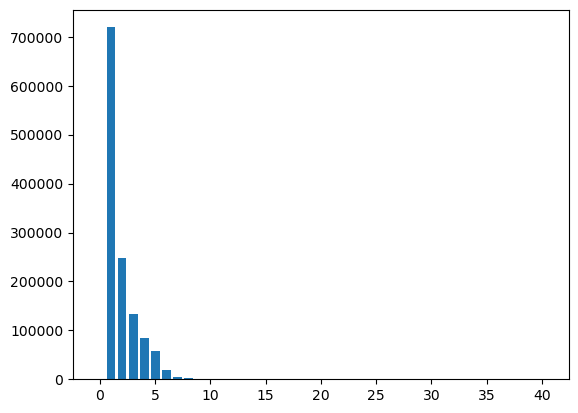

In [17]:
purchase_counts = {}
for i, _ in enumerate(purchases):
    cnt = len(purchases[i])
    if cnt not in purchase_counts:
        purchase_counts[cnt] = 1
    else:
        purchase_counts[cnt] += 1

#generate bar plot from purchase counts
        
import matplotlib.pyplot as plt
plt.bar(purchase_counts.keys(), purchase_counts.values())
plt.show()

In [18]:
for i, _ in enumerate(purchases):
    purchases[i].sort(key=lambda x: x[2])

In [19]:
a = 10
b = 10
print("single purchase: ")
for i, p in enumerate(purchases):
    if len(p) == 1:
        if a > 0:
            print(i, p)
            a -= 1

print("more than 5 purchase: ")
for i, p in enumerate(purchases):
    if len(p) > 5:
        if b > 0:
            print(i, p)
            b -= 1


single purchase: 
0 [(12, 1, 123)]
1 [(12, 1, 123)]
3 [(6, 1, 123)]
4 [(4, 1, 123)]
6 [(227, 1, 123)]
7 [(6, 1, 123)]
10 [(12, 1, 123)]
11 [(231, 1, 123)]
13 [(278, 1, 123)]
16 [(231, 1, 123)]
more than 5 purchase: 
5 [(238, 1, 14), (238, 1, 36), (238, 1, 56), (238, 1, 80), (238, 1, 100), (238, 1, 123)]
14 [(203, 1, 35), (203, 1, 53), (203, 1, 63), (221, 1, 72), (203, 1, 81), (203, 1, 87), (238, 1, 97), (204, 1, 123), (204, 1, 135), (272, 1, 150)]
38 [(8, 1, 15), (8, 1, 30), (8, 1, 60), (8, 1, 82), (8, 1, 104), (8, 1, 123)]
39 [(238, 1, 20), (238, 1, 44), (268, 1, 54), (238, 1, 67), (238, 1, 76), (238, 1, 89), (238, 1, 98), (238, 1, 105), (228, 1, 123), (238, 1, 129), (238, 1, 133), (238, 1, 138), (238, 1, 142), (230, 1, 147), (238, 1, 150)]
42 [(260, 1, 8), (203, 1, 23), (221, 1, 38), (221, 1, 65), (271, 1, 84), (272, 1, 104), (221, 1, 123), (276, 1, 145)]
43 [(137, 1, 6), (137, 1, 23), (137, 1, 42), (137, 1, 62), (137, 1, 79), (174, 1, 97), (174, 1, 123)]
44 [(238, 1, 18), (238, 1, 1

In [20]:
boxes_df[109:111]

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
109,110,Premium,Delivery from Collection Point,0.0,4.4,15.96
110,111,Premium,Delivery from Collection Point,0.0,4.7,15.96


In [21]:
len(boxes_df)

290

In [22]:
def meat_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    meat_consumed = 0
    for id, cnt, _ in boxes:
        meat_consumed += cnt * boxes_df.at[id - 1, 'MEAT']
    return meat_consumed

def meat_consumption_rate(cid, end_day=151):
    if len(purchases[cid]) == 0:
        return 0.0
    start = purchases[cid][0][2]
    return meat_consumed(cid, start, end_day) / (end_day - start)

In [23]:
last_day = purchase_df['day'].max()
last_day

150

In [24]:
last_date = datetime.date(2019, 2, 28)
(last_date - base_date).days

150

In [25]:
first_day = purchase_df['day'].min()
first_day

0

In [26]:
meat_consumption_rate(0)

0.05357142857142857

In [27]:
def last_meat_consumption(cid, end_day=150):
    consumptions = list(filter(lambda x: x[2] < end_day and boxes_df.at[x[0] - 1, 'MEAT'] > 0.0, purchases[cid]))
    try:
        bid, cnt, day = consumptions[-1]
    except:
        return None
    return [cnt * boxes_df.at[bid - 1, 'MEAT'], 
            cnt,
            end_day - day,
            int(boxes_df.at[bid - 1, 'QUALITY'] == 'Standard'), 
            int('CoD' not in str(boxes_df.at[bid - 1, 'DELIVERY_OPTION'])), 
            float(boxes_df.at[bid - 1, 'UNIT_PRICE'])]
last_meat_consumption(3588, 150)

[4.4, 1, 27, 0, 1, 15.96]

In [35]:
split = int(len(purchases) * 0.1)
idx = [i for i in range(len(purchases))]
random.shuffle(idx)
val_idx = idx[:split]
train_idx = idx[split:]

def generate_batch(day, batch_size, split='train'):
    batch = []
    labels = []
    n = 0
    if split == 'train':
        random.shuffle(train_idx)
    else:
        random.shuffle(val_idx)
    for cid in train_idx:
        if len(purchases[cid]) < 2:
            continue
        last_meat = last_meat_consumption(cid, day)
        if last_meat is not None:
            rate = meat_consumption_rate(cid, day)
            next_meat = meat_consumed(cid, day, day + 15)
            if next_meat > 0.0:
                features = [rate]
                features.extend(last_meat)
                batch.append(features)
                labels.append(next_meat)
                n += 1
                if split=='train' and n == batch_size:
                    return batch, labels
    if split == 'train':
        return None, None
    else:
        return batch, labels
batch, labels = generate_batch(15, 10)
print(batch)
print(labels)

[[0.12000000000000001, 1.8, 1, 15, 0, 1, 19.98], [0.1285714285714286, 1.8, 1, 14, 0, 1, 19.98], [0.18, 1.8, 1, 10, 0, 1, 19.98], [0.3, 1.8, 1, 6, 1, 1, 17.98], [0.32727272727272727, 3.6, 1, 11, 0, 1, 15.96], [0.2, 1.8, 1, 9, 0, 1, 19.98], [0.23636363636363636, 1.3, 1, 10, 0, 0, 15.98], [0.12000000000000001, 1.8, 1, 15, 1, 1, 17.98], [0.1285714285714286, 1.8, 1, 14, 1, 1, 17.98], [0.2, 1.8, 1, 9, 1, 1, 17.98]]
[2.0, 1.8, 1.8, 2.2, 4.0, 1.8, 2.0, 2.2, 1.8, 2.2]


In [36]:
import gc

class MeatPredictor(torch.nn.Module):
    def __init__(self):
        super(MeatPredictor, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(7, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.mlp(x).reshape(-1)

model = MeatPredictor()
model(torch.tensor(batch, dtype=torch.float32))

tensor([0.0435, 0.0473, 0.0652, 0.0701, 0.0540, 0.0678, 0.0565, 0.0399, 0.0431,
        0.0650], grad_fn=<ViewBackward0>)

In [37]:
torch.cuda.empty_cache()
gc.collect()

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_loss = 1e9
batch_size = 256
epochs = 1000

val, val_labels = generate_batch(120, split, 'val')
val = torch.tensor(val, dtype=torch.float32)
val_labels = torch.tensor(val_labels, dtype=torch.float32)
print(val)
print(val_labels)

for epoch in range(epochs):
    batch, labels = generate_batch(random.randint(70, 136), batch_size)
    if batch is None:
        continue
    batch = torch.tensor(batch, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.float32)
    optimizer.zero_grad()
    outputs = model(batch)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(epoch, loss.item())
    if epoch % 20 == 0:
        val_outputs = model(val)
        val_loss = loss_fn(val_outputs, val_labels)
        print("Validation loss: ", val_loss.item())
        if val_loss.item() < best_loss:
            torch.save(model.state_dict(), 'meat_predictor.pth')
            best_loss = val_loss.item()

model.load_state_dict(torch.load('meat_predictor.pth'))

tensor([[ 0.0653,  2.2000,  1.0000,  ...,  1.0000,  1.0000, 19.9800],
        [ 0.0382,  2.9000,  1.0000,  ...,  0.0000,  0.0000, 15.9600],
        [ 0.0688,  2.2000,  1.0000,  ...,  0.0000,  1.0000, 23.9800],
        ...,
        [ 0.0330,  1.8000,  1.0000,  ...,  1.0000,  1.0000, 19.9800],
        [ 0.1333,  4.0000,  1.0000,  ...,  0.0000,  1.0000, 15.9600],
        [ 0.0491,  1.8000,  1.0000,  ...,  0.0000,  1.0000, 19.9800]])
tensor([2.2000, 4.4000, 2.2000,  ..., 2.2000, 2.4000, 2.2000])
0 5.794527530670166
Validation loss:  5.138489246368408
10 2.268266439437866
20 0.9935745000839233
Validation loss:  1.0103859901428223
30 0.9203022718429565
40 0.8623112440109253
Validation loss:  0.8360031843185425
50 0.9345591068267822
60 0.748632550239563
Validation loss:  0.7397035360336304
70 0.6031990647315979
80 0.587608814239502
Validation loss:  0.6202426552772522
90 0.43913379311561584
100 0.30675941705703735
Validation loss:  0.3856302797794342
110 0.24775785207748413
120 0.227407589554

<All keys matched successfully>

In [176]:
def predict(cid, day):
    rate = meat_consumption_rate(cid, day)
    last_meat = last_meat_consumption(cid, day)
    if last_meat is not None:
        return model(torch.tensor([rate, last_meat[0], last_meat[1]], dtype=torch.float32)).item()
    return 0.0

In [177]:

data = []
for cid in prob3_customers:
    data.append({
        'MAGIC_KEY': customer_keys[cid],
        'MEAT': predict(cid, 151)
    })
sub_df = pd.DataFrame(data, columns=['MAGIC_KEY', 'MEAT'])
sub_df.to_csv('submission.csv', index=False)